#CNN

**Using Dropout on the network**

In [ ]:
!pip install tensorflow

Libraries I used

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


I took the images file and divided it into train and test and within each folder I divided it into our four categories

I made a division of 80,20% for images for train and test files because this is a fair division for a small amount of data

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
original_directory = '/content/drive/MyDrive/רשתות ניורונים/Ex6/Photos1'  # Directory containing the original images
new_directory = '/content/drive/MyDrive/רשתות ניורונים/Ex6/New_Photos1'  # Directory to contain the new structure

# Categories
categories = ['cloudy', 'rain', 'shine', 'sunrise']

# Create train and test directories
train_directory = os.path.join(new_directory, 'train')
test_directory = os.path.join(new_directory, 'test')

os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

for category in categories:
    os.makedirs(os.path.join(train_directory, category), exist_ok=True)
    os.makedirs(os.path.join(test_directory, category), exist_ok=True)

# Collect images
images = {category: [] for category in categories}
for category in categories:
    for filename in os.listdir(original_directory):
        if filename.startswith(category):
            images[category].append(filename)

# Split images into train and test sets
train_images = {}
test_images = {}
for category in categories:
    train_images[category], test_images[category] = train_test_split(images[category], test_size=0.2, random_state=42)

# Copy images to the new directory structure
for category in categories:
    for image in train_images[category]:
        src_path = os.path.join(original_directory, image)
        dst_path = os.path.join(train_directory, category, image)
        shutil.copyfile(src_path, dst_path)

    for image in test_images[category]:
        src_path = os.path.join(original_directory, image)
        dst_path = os.path.join(test_directory, category, image)
        shutil.copyfile(src_path, dst_path)

print("Images have been organized into train and test sets.")

Images have been organized into train and test sets.


Preparing the images so that I can run the CNN model on them

In [ ]:
# Paths to the data
train_directory = '/content/drive/MyDrive/רשתות ניורונים/Ex6/New_Photos1/train'
test_directory = '/content/drive/MyDrive/רשתות ניורונים/Ex6/New_Photos1/test'

# Parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 899 images belonging to 4 classes.
Found 226 images belonging to 4 classes.


The cnn model that worked best for me - with 3 layers and dropout = 0.5

In [ ]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 categories
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Running the model on the training group

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

Epoch 1/20
29/29 [==============================] - 61s 2s/step - loss: 1.0974 - accuracy: 0.5273 - val_loss: 0.5695 - val_accuracy: 0.7743
Epoch 2/20
29/29 [==============================] - 57s 2s/step - loss: 0.6219 - accuracy: 0.7853 - val_loss: 0.3056 - val_accuracy: 0.8894
Epoch 3/20
29/29 [==============================] - 61s 2s/step - loss: 0.3571 - accuracy: 0.8821 - val_loss: 0.3594 - val_accuracy: 0.8584
Epoch 4/20
29/29 [==============================] - 61s 2s/step - loss: 0.3507 - accuracy: 0.8821 - val_loss: 0.2063 - val_accuracy: 0.9336
Epoch 5/20
29/29 [==============================] - 63s 2s/step - loss: 0.3140 - accuracy: 0.8877 - val_loss: 0.2597 - val_accuracy: 0.9159
Epoch 6/20
29/29 [==============================] - 56s 2s/step - loss: 0.2687 - accuracy: 0.9055 - val_loss: 0.2021 - val_accuracy: 0.9292
Epoch 7/20
29/29 [==============================] - 56s 2s/step - loss: 0.2102 - accuracy: 0.9188 - val_loss: 0.2499 - val_accuracy: 0.9071
Epoch 8/20
29/29 [==

**accuracy**

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')

8/8 [==============================] - 4s 434ms/step - loss: 0.2092 - accuracy: 0.9513
Test accuracy: 95.13%


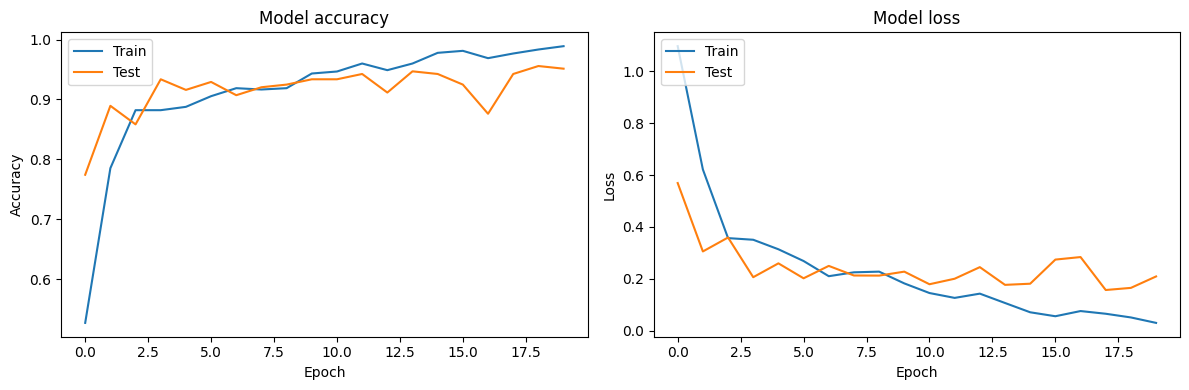

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

Overall I was able to get really good results over 95% match which is great, Although overfitting turned out to be less good.